# <center> TD2 Modèlisation Mathématique </center>


Nous allons développer cette semaine l'algorithme des *k* plus proches voisins.

Nous allons d'abord le développer à la main. 

> *Dans le monde professionnel, il ne faudra surtout pas utiliser un programme de classification développé à la main car il ne sera pas optimisé. Nous le réalisons ici dans un but pédagogique afin de bien comprendre comment il fonctionne et pour le maîtriser.*

Nous verrons en fin de ce TD comment utiliser la bibliothèque *scikit-learn* pour mettre en place ce classifieur de manière très aisée.

L'algorithme des *k plus proches voisins* est un algorithme de classification.  
Il n'y a pas à proprement parlé dans cet algorithme de phase d'apprentissage comme nous en verrons dans d'autres algorithmes. 
L'ensemble d'apprentissage correspond aux données qui sont classées. L'ensemble de test est constitué de données à classer pour tester l'algorithme.

La phase de prédiction consiste pour chaque élément de l'ensemble de test à prédire son étiquette en déterminant la classe majoritaire de ses *k* plus proches voisins qui sera alors la sienne.

Nous allons travailler avec un jeu de données "jouet" conçu pour tester les algorithmes sur des exemples simples (*make_circles*).




In [1]:
#chargement des bibliothèques python

import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
# pour générer le jeu de données
from sklearn.datasets import make_circles
#pour calculer l'exactitude (accuracy) de la prédiction
from sklearn.metrics import accuracy_score



### 1) Mise en place des données

Nous allons ici générer le jeu de données. Nous aurons:
 - les données et les étiquettes d'apprentissage: *x_train* et *y_train* (de taille 100)
 - les données et les étiquettes de test: *x_test* et *y_test* (de taille 50)

 Ce sont ces données de test que nous classifierons (*x_test*) en nous appuyant sur la classification des données d'apprentissage.
 
 Nous évaluerons la classification obtenue des élèments de *x_test* par rapport à la classification réelle de ces élèments (*y_test*)


### 3) Utilisation du classifieur

a) Vous réaliserez les prédictions des étiquettes des classes sur les données *x_test* 

b) Vous représenterez graphiquement les données d'apprentissage et de test avec les étiquettes des classes prédites

c) Vous calculerez le score d'exactitude (accuracy) de votre prédiction. Les données de test n'étant pas très bruitées vous devez obtenir 1.  
Modifier le paramètre *noise* de la fonction qui a permis de générer les données de test, pour obtenir des données plus bruitées (ce qui va dégrader les résultats). Refaites une prédiction sur ces nouvelles données.
Afficher aussi les valeurs de la précision et du rappel. 

d) Vous générerez la matrice de confusion et recalculerez les valeurs de l'exactitude, de la précision et du rappel (avec les formules vues en cours). Vous devez retrouver les résultats précédents.

In [28]:
knn_model = KnnClassifieur(k=3, x_train=x_train, y_train=y_train)
etiquettes_predites = knn_model.predict(x_test)

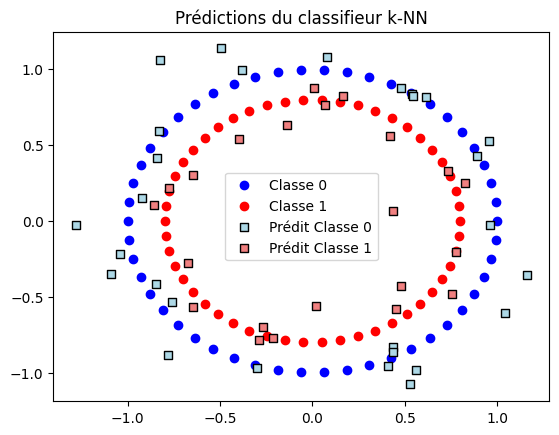

In [31]:
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], c='blue', label='Classe 0')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], c='red', label='Classe 1')

plt.scatter(x_test[etiquettes_predites == 0][:, 0], x_test[etiquettes_predites == 0][:, 1], c='lightblue', marker='s', edgecolors='black', label='Prédit Classe 0')
plt.scatter(x_test[etiquettes_predites == 1][:, 0], x_test[etiquettes_predites == 1][:, 1], c='lightcoral', marker='s', edgecolors='black', label='Prédit Classe 1')

plt.title('Prédictions du classifieur k-NN')
plt.legend()
plt.show()


In [38]:
from sklearn.metrics import precision_score, recall_score


accuracy = accuracy_score(y_test, etiquettes_predites)
print(f'Exactitude : {accuracy}')


precision = precision_score(y_test, etiquettes_predites)
recall = recall_score(y_test, etiquettes_predites)

print(f'Précision : {precision}')
print(f'Rappel : {recall}')

Exactitude : 0.74
Précision : 0.7727272727272727
Rappel : 0.68


In [37]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, etiquettes_predites)
tn, fp, fn, tp = conf_matrix.ravel()

accuracy_noisy = (tp + tn) / (tp + tn + fp + fn)
precision_noisy = tp / (tp + fp)
recall_noisy = tp / (tp + fn)

print(f'Exactitude (accuracy) avec données bruitées : {accuracy_noisy}')
print(f'Précision (precision) avec données bruitées : {precision_noisy}')
print(f'Rappel (recall) avec données bruitées : {recall_noisy}')

Exactitude (accuracy) avec données bruitées : 0.74
Précision (precision) avec données bruitées : 0.7727272727272727
Rappel (recall) avec données bruitées : 0.68
